# [MTP] -> Underwater Gesture Detection Using Custom CNN layers + Attention Layer

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, Model

## Custom CNN layers + Attention Layer (Image Classifier)

In [ ]:
def create_custom_cnn_with_attention(input_shape=(224, 224, 3), num_classes=7):
    inputs = layers.Input(shape=input_shape)

    # Custom CNN Block 1
    x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D((2, 2))(x)
    x = layers.Dropout(0.25)(x)

    # Custom CNN Block 2
    x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D((2, 2))(x)
    x = layers.Dropout(0.25)(x)

    # Custom CNN Block 3
    x = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D((2, 2))(x)
    x = layers.Dropout(0.25)(x)

    # Apply Attention Layer
    x = SpatialAttention()(x) # Apply attention to feature maps

    # Global Average Pooling (reduces spatial dimensions, keeps channel info)
    x = layers.GlobalAveragePooling2D()(x)

    # Classifier Head
    x = layers.Dense(128, activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    outputs = layers.Dense(num_classes, activation='softmax')(x) # 7 classes

    model = tf.keras.Model(inputs=inputs, outputs=outputs, name="CustomCNN_Attention")
    return model

# Create the model
model = create_custom_cnn_with_attention(input_shape=(224, 224, 3), num_classes=7)
device = tf.config.list_physical_devices('GPU')
print(f"✅ GPU detected: {len(device)}")
model.summary()

✅ GPU detected: 1


Model: "CustomCNN_Attention"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 224, 224, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 224, 224, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 112, 112, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 112, 112, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 56, 56, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spatial_attention_1             │ (None, 28, 28, 128)    │            99 │
│ (SpatialAttention)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 128)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 7)              │           903 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 111,658 (436.16 KB)

 Trainable params: 111,210 (434.41 KB)

 Non-trainable params: 448 (1.75 KB)

### Unzipping the dataset

In [ ]:
# Unzip the file
!unzip -q Underwater_Gesture_Images.zip

print(f"✅ Successfully unzipped")

✅ Successfully unzipped


# Main Block

In [ ]:
import os
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

# ======================
# 🚀 ENABLE MIXED PRECISION (T4 GPU OPTIMIZATION)
# ======================
from tensorflow.keras import mixed_precision
policy = mixed_precision.Policy('mixed_float16')  # Use FP16 on T4 for speed
mixed_precision.set_global_policy(policy)
print("✅ Mixed precision enabled:", policy)

# ======================
# 1. CONFIGURATION
# ======================
DATASET_PATH = "/content"
CLASSES = ['stop', 'three', 'one', 'up', 'two', 'four', 'down']
SPLIT_RATIO = [0.7, 0.15, 0.15]  # train, val, test
IMG_HEIGHT, IMG_WIDTH = 224, 224
BATCH_SIZE = 32  # Can increase to 64 or 128 if GPU memory allows
AUTOTUNE = tf.data.AUTOTUNE

# ======================
# 2. LOAD & SHUFFLE DATASET
# ======================
def load_dataset(dataset_path, classes):
    images = []
    labels = []
    for idx, class_name in enumerate(classes):
        class_path = os.path.join(dataset_path, class_name)
        for img_name in os.listdir(class_path):
            if img_name.lower().endswith(('.png', '.jpg', '.jpeg')):
                img_path = os.path.join(class_path, img_name)
                images.append(img_path)
                labels.append(idx)
    images = np.array(images)
    labels = np.array(labels)
    # Shuffle
    indices = np.arange(len(images))
    np.random.seed(42)
    np.random.shuffle(indices)
    return images[indices], labels[indices]

images, labels = load_dataset(DATASET_PATH, CLASSES)
print(f"✅ Loaded {len(images)} images.")

# ======================
# 3. SPLIT DATASET
# ======================
# Split 1: 70% train, 30% temp
X_train, X_temp, y_train, y_temp = train_test_split(
    images, labels, test_size=0.3, stratify=labels, random_state=42
)
# Split 2: 15% val, 15% test
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42
)

print(f"📊 Train: {len(X_train)}, Val: {len(X_val)}, Test: {len(X_test)}")

# ======================
# 4. DEFINE AUGMENTATION & PREPROCESSING (GPU-OPTIMIZED tf.data)
# ======================
def preprocess_image(image_path, label, augment=False):
    try:
        image = tf.io.read_file(image_path)
        # Use tf.image.decode_image to handle multiple formats automatically
        image = tf.image.decode_image(image, channels=3, expand_animations=False) # Important for GIFs

        image = tf.image.resize(image, [IMG_HEIGHT, IMG_WIDTH])
        image.set_shape([IMG_HEIGHT, IMG_WIDTH, 3])  # Set shape after resizing

        if augment:
            image = tf.image.random_flip_left_right(image)
            image = tf.image.random_brightness(image, 0.2)
            image = tf.image.random_contrast(image, 0.8, 1.2)
            image = tf.image.random_saturation(image, 0.8, 1.2)
            image = tf.image.random_hue(image, 0.1)

        image = tf.cast(image, tf.float32) / 255.0
        label = tf.one_hot(label, len(CLASSES), dtype=tf.float32)
        return image, label

    except Exception as e:
        # This will now catch genuine errors, like truly corrupt files
        tf.print("Skipping corrupted or unsupported image:", image_path, "Error:", e)
        # Return a zero tensor to avoid crashing the training batch
        return tf.zeros([IMG_HEIGHT, IMG_WIDTH, 3], dtype=tf.float32), tf.one_hot(label, len(CLASSES), dtype=tf.float32)


def create_dataset(image_paths, labels, augment=False, shuffle=True, batch_size=BATCH_SIZE):
    dataset = tf.data.Dataset.from_tensor_slices((image_paths, labels))
    # ...
    dataset = dataset.map(
        lambda x, y: preprocess_image(x, y, augment=augment),
        num_parallel_calls=AUTOTUNE
    )

    # ✅ ENABLE THIS LINE NOW
    # This will keep the processed images in RAM for instant access on subsequent epochs.
    dataset = dataset.cache()

    if shuffle:
        dataset = dataset.shuffle(buffer_size=1000)

    dataset = dataset.batch(batch_size)
    dataset = dataset.prefetch(AUTOTUNE)
    return dataset

# ✅ CREATE OPTIMIZED DATASETS
train_ds = create_dataset(X_train, y_train, augment=True, shuffle=True)
val_ds = create_dataset(X_val, y_val, augment=False, shuffle=False)
test_ds = create_dataset(X_test, y_test, augment=False, shuffle=False)

print("✅ tf.data pipelines ready with GPU optimization.")

# ======================
# 5. (OPTIONAL) CACHE DATASET IN MEMORY (IF FITS)
# ======================
# ⚠️ Only use if dataset is small enough to fit in RAM (e.g., < 10K images)
# train_ds = train_ds.cache().prefetch(AUTOTUNE)
# val_ds = val_ds.cache().prefetch(AUTOTUNE)

# ======================
# 6. BUILD MODEL (WITH MIXED PRECISION COMPATIBLE LAYERS)
# ======================
from tensorflow.keras import layers, Model

class SpatialAttention(layers.Layer):
    def __init__(self, kernel_size=7, **kwargs):
        super(SpatialAttention, self).__init__(**kwargs)
        self.conv = layers.Conv2D(1, kernel_size, padding='same', activation='sigmoid')

    def call(self, inputs):
        avg_out = tf.reduce_mean(inputs, axis=-1, keepdims=True)
        max_out = tf.reduce_max(inputs, axis=-1, keepdims=True)
        concat = layers.Concatenate(axis=-1)([avg_out, max_out])
        attention_map = self.conv(concat)
        return inputs * attention_map

def create_model(input_shape=(224, 224, 3), num_classes=7):
    inputs = layers.Input(shape=input_shape)

    x = layers.Conv2D(32, 3, activation='relu', padding='same')(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D(2)(x)
    x = layers.Dropout(0.25)(x)

    x = layers.Conv2D(64, 3, activation='relu', padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D(2)(x)
    x = layers.Dropout(0.25)(x)

    x = layers.Conv2D(128, 3, activation='relu', padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D(2)(x)
    x = layers.Dropout(0.25)(x)

    x = SpatialAttention()(x)

    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(128, activation='relu', dtype='float32')(x)  # Keep classifier in FP32 for stability
    x = layers.Dropout(0.5)(x)
    outputs = layers.Dense(num_classes, activation='softmax', dtype='float32')(x)  # Final layer in FP32

    model = Model(inputs, outputs)
    return model

model = create_model()
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

print("✅ Model compiled with mixed precision support.")

# ======================
# 7. TRAIN WITH CALLBACKS (GPU OPTIMIZED)
# ======================
callbacks = [
    tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3),
    tf.keras.callbacks.ModelCheckpoint('/content/best_model.h5', save_best_only=True, monitor='val_accuracy')
]

# ⚡ TRAIN ON GPU
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=50,
    callbacks=callbacks,
    verbose=1
)

# ======================
# 8. EVALUATE
# ======================
test_loss, test_acc = model.evaluate(test_ds, verbose=1)
print(f"🎯 Test Accuracy: {test_acc:.4f}")

# Save final model
model.save("/content/final_underwater_gesture_model.h5")
print("✅ Model saved.")

✅ Mixed precision enabled: <DTypePolicy "mixed_float16">
✅ Loaded 7850 images.
📊 Train: 5495, Val: 1177, Test: 1178
✅ tf.data pipelines ready with GPU optimization.
✅ Model compiled with mixed precision support.
Epoch 1/50
172/172 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step - accuracy: 0.2587 - loss: 1.8758

172/172 ━━━━━━━━━━━━━━━━━━━━ 61s 214ms/step - accuracy: 0.2589 - loss: 1.8755 - val_accuracy: 0.2022 - val_loss: 1.9504 - learning_rate: 0.0010
Epoch 2/50
172/172 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.3713 - loss: 1.6305

172/172 ━━━━━━━━━━━━━━━━━━━━ 33s 45ms/step - accuracy: 0.3714 - loss: 1.6303 - val_accuracy: 0.2642 - val_loss: 1.8604 - learning_rate: 0.0010
Epoch 3/50
172/172 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.4144 - loss: 1.5049

172/172 ━━━━━━━━━━━━━━━━━━━━ 8s 44ms/step - accuracy: 0.4145 - loss: 1.5048 - val_accuracy: 0.4401 - val_loss: 1.6027 - learning_rate: 0.0010
Epoch 4/50
172/172 ━━━━━━━━━━━━━━━━━━━━ 8s 44ms/step - accuracy: 0.4563 - loss: 1.4094 - val_accuracy: 0.3968 - val_loss: 1.4479 - learning_rate: 0.0010
Epoch 5/50
172/172 ━━━━━━━━━━━━━━━━━━━━ 7s 44ms/step - accuracy: 0.5272 - loss: 1.2620 - val_accuracy: 0.4078 - val_loss: 1.4885 - learning_rate: 0.0010
Epoch 6/50
171/172 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.5602 - loss: 1.1894

172/172 ━━━━━━━━━━━━━━━━━━━━ 8s 44ms/step - accuracy: 0.5605 - loss: 1.1888 - val_accuracy: 0.6143 - val_loss: 1.0973 - learning_rate: 0.0010
Epoch 7/50
172/172 ━━━━━━━━━━━━━━━━━━━━ 7s 43ms/step - accuracy: 0.6200 - loss: 1.0616 - val_accuracy: 0.5276 - val_loss: 1.1193 - learning_rate: 0.0010
Epoch 8/50
172/172 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.7051 - loss: 0.8624

172/172 ━━━━━━━━━━━━━━━━━━━━ 8s 44ms/step - accuracy: 0.7052 - loss: 0.8620 - val_accuracy: 0.7952 - val_loss: 0.6179 - learning_rate: 0.0010
Epoch 9/50
172/172 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.7846 - loss: 0.6585

172/172 ━━━━━━━━━━━━━━━━━━━━ 8s 44ms/step - accuracy: 0.7846 - loss: 0.6584 - val_accuracy: 0.8454 - val_loss: 0.5759 - learning_rate: 0.0010
Epoch 10/50
172/172 ━━━━━━━━━━━━━━━━━━━━ 8s 44ms/step - accuracy: 0.8135 - loss: 0.5779 - val_accuracy: 0.8063 - val_loss: 0.6399 - learning_rate: 0.0010
Epoch 11/50
171/172 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.8521 - loss: 0.4935

172/172 ━━━━━━━━━━━━━━━━━━━━ 8s 45ms/step - accuracy: 0.8522 - loss: 0.4930 - val_accuracy: 0.8887 - val_loss: 0.3857 - learning_rate: 0.0010
Epoch 12/50
172/172 ━━━━━━━━━━━━━━━━━━━━ 10s 44ms/step - accuracy: 0.8806 - loss: 0.4005 - val_accuracy: 0.8658 - val_loss: 0.4023 - learning_rate: 0.0010
Epoch 13/50
172/172 ━━━━━━━━━━━━━━━━━━━━ 10s 43ms/step - accuracy: 0.8976 - loss: 0.3614 - val_accuracy: 0.2167 - val_loss: 7.0809 - learning_rate: 0.0010
Epoch 14/50
172/172 ━━━━━━━━━━━━━━━━━━━━ 8s 44ms/step - accuracy: 0.9071 - loss: 0.3328 - val_accuracy: 0.5854 - val_loss: 1.3370 - learning_rate: 0.0010
Epoch 15/50
171/172 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.9311 - loss: 0.2561

172/172 ━━━━━━━━━━━━━━━━━━━━ 7s 43ms/step - accuracy: 0.9312 - loss: 0.2560 - val_accuracy: 0.9422 - val_loss: 0.2083 - learning_rate: 5.0000e-04
Epoch 16/50
172/172 ━━━━━━━━━━━━━━━━━━━━ 8s 45ms/step - accuracy: 0.9315 - loss: 0.2313 - val_accuracy: 0.8564 - val_loss: 0.3665 - learning_rate: 5.0000e-04
Epoch 17/50
171/172 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.9408 - loss: 0.2156

172/172 ━━━━━━━━━━━━━━━━━━━━ 8s 48ms/step - accuracy: 0.9408 - loss: 0.2156 - val_accuracy: 0.9609 - val_loss: 0.1443 - learning_rate: 5.0000e-04
Epoch 18/50
172/172 ━━━━━━━━━━━━━━━━━━━━ 9s 44ms/step - accuracy: 0.9370 - loss: 0.2325 - val_accuracy: 0.9091 - val_loss: 0.3505 - learning_rate: 5.0000e-04
Epoch 19/50
172/172 ━━━━━━━━━━━━━━━━━━━━ 10s 43ms/step - accuracy: 0.9375 - loss: 0.2093 - val_accuracy: 0.9473 - val_loss: 0.1766 - learning_rate: 5.0000e-04
Epoch 20/50
172/172 ━━━━━━━━━━━━━━━━━━━━ 8s 45ms/step - accuracy: 0.9455 - loss: 0.1874 - val_accuracy: 0.9431 - val_loss: 0.1950 - learning_rate: 5.0000e-04
Epoch 21/50
172/172 ━━━━━━━━━━━━━━━━━━━━ 7s 43ms/step - accuracy: 0.9455 - loss: 0.1849 - val_accuracy: 0.9575 - val_loss: 0.1316 - learning_rate: 2.5000e-04
Epoch 22/50
172/172 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.9470 - loss: 0.1747

172/172 ━━━━━━━━━━━━━━━━━━━━ 10s 44ms/step - accuracy: 0.9471 - loss: 0.1746 - val_accuracy: 0.9635 - val_loss: 0.1316 - learning_rate: 2.5000e-04
Epoch 23/50
172/172 ━━━━━━━━━━━━━━━━━━━━ 8s 44ms/step - accuracy: 0.9557 - loss: 0.1611 - val_accuracy: 0.9473 - val_loss: 0.1740 - learning_rate: 2.5000e-04
Epoch 24/50
171/172 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.9502 - loss: 0.1609

172/172 ━━━━━━━━━━━━━━━━━━━━ 10s 44ms/step - accuracy: 0.9502 - loss: 0.1609 - val_accuracy: 0.9652 - val_loss: 0.1303 - learning_rate: 2.5000e-04
Epoch 25/50
172/172 ━━━━━━━━━━━━━━━━━━━━ 10s 43ms/step - accuracy: 0.9474 - loss: 0.1695 - val_accuracy: 0.9626 - val_loss: 0.1297 - learning_rate: 2.5000e-04
Epoch 26/50
172/172 ━━━━━━━━━━━━━━━━━━━━ 10s 44ms/step - accuracy: 0.9562 - loss: 0.1539 - val_accuracy: 0.9405 - val_loss: 0.1894 - learning_rate: 2.5000e-04
Epoch 27/50
172/172 ━━━━━━━━━━━━━━━━━━━━ 10s 45ms/step - accuracy: 0.9571 - loss: 0.1521 - val_accuracy: 0.9584 - val_loss: 0.1285 - learning_rate: 2.5000e-04
Epoch 28/50
172/172 ━━━━━━━━━━━━━━━━━━━━ 7s 43ms/step - accuracy: 0.9557 - loss: 0.1496 - val_accuracy: 0.9601 - val_loss: 0.1359 - learning_rate: 2.5000e-04
Epoch 29/50
172/172 ━━━━━━━━━━━━━━━━━━━━ 8s 45ms/step - accuracy: 0.9555 - loss: 0.1452 - val_accuracy: 0.9635 - val_loss: 0.1233 - learning_rate: 2.5000e-04
Epoch 30/50
171/172 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accu

172/172 ━━━━━━━━━━━━━━━━━━━━ 10s 45ms/step - accuracy: 0.9626 - loss: 0.1330 - val_accuracy: 0.9669 - val_loss: 0.1131 - learning_rate: 2.5000e-04
Epoch 31/50
172/172 ━━━━━━━━━━━━━━━━━━━━ 7s 43ms/step - accuracy: 0.9596 - loss: 0.1370 - val_accuracy: 0.9643 - val_loss: 0.1115 - learning_rate: 2.5000e-04
Epoch 32/50
172/172 ━━━━━━━━━━━━━━━━━━━━ 8s 44ms/step - accuracy: 0.9593 - loss: 0.1291 - val_accuracy: 0.9626 - val_loss: 0.1153 - learning_rate: 2.5000e-04
Epoch 33/50
172/172 ━━━━━━━━━━━━━━━━━━━━ 10s 45ms/step - accuracy: 0.9601 - loss: 0.1327 - val_accuracy: 0.9635 - val_loss: 0.1130 - learning_rate: 2.5000e-04
Epoch 34/50
172/172 ━━━━━━━━━━━━━━━━━━━━ 10s 44ms/step - accuracy: 0.9580 - loss: 0.1354 - val_accuracy: 0.9626 - val_loss: 0.1071 - learning_rate: 2.5000e-04
Epoch 35/50
172/172 ━━━━━━━━━━━━━━━━━━━━ 10s 43ms/step - accuracy: 0.9619 - loss: 0.1216 - val_accuracy: 0.9490 - val_loss: 0.1775 - learning_rate: 2.5000e-04
Epoch 36/50
172/172 ━━━━━━━━━━━━━━━━━━━━ 10s 45ms/step - acc

🎯 Test Accuracy: 0.9635
✅ Model saved.


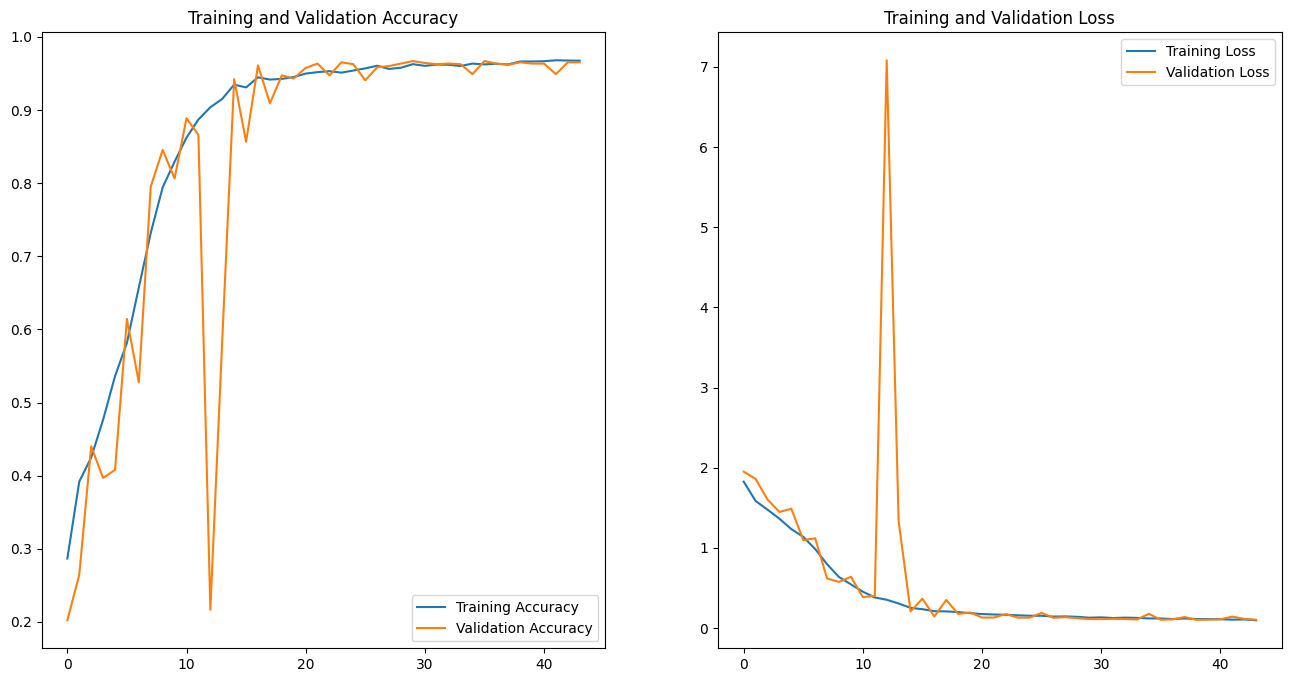

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [10]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss', 'learning_rate'])

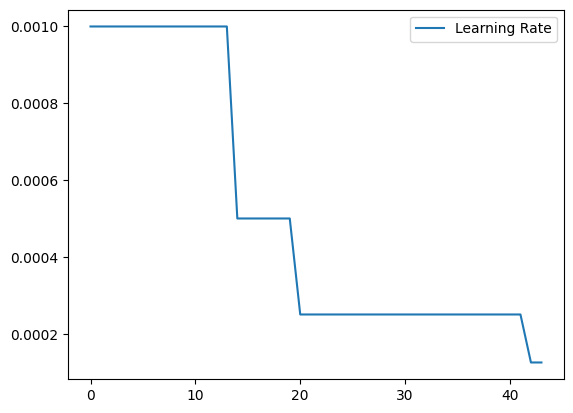

In [11]:
plt.plot(epochs_range, history.history['learning_rate'], label='Learning Rate')
plt.legend()
plt.show()